In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace = 0.01, wspace = 0.1)
    
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            ax.set_xlabel("class: {0}".format(i))
            ax.imshow(W[i, :].view(28, 28), vmin = w_min, vmax = w_max, cmap = 'seismic')
            ax.set_xticks([])
            ax.set_yticks([])
            
    plt.show()

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap = 'gray')
    plt.title('y = ' +str(data_sample[1].item()))

In [4]:
train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [5]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [6]:
print("Type of data element: ", train_dataset[0][1].type())

Type of data element:  torch.LongTensor


In [7]:
print("The label: ", train_dataset[3][1])

The label:  tensor(1)


The image:  None


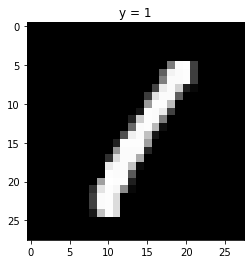

In [8]:
print("The image: ", show_data(train_dataset[3]))

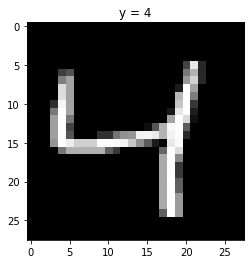

In [9]:
show_data(train_dataset[2])

In [10]:
#Build a softmax classifier

In [19]:
# Define softmax classifier class

class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        z = self.linear(x)
        return z

In [20]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [21]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

In [22]:
model = SoftMax(input_dim, output_dim)
print("Print the model:\n", model)

Print the model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [23]:
print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


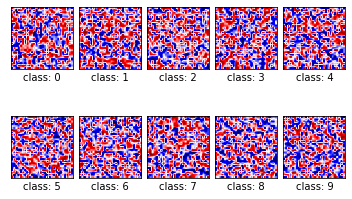

In [24]:
PlotParameters(model)

In [25]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [26]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            optimizer.step()
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs) 
        

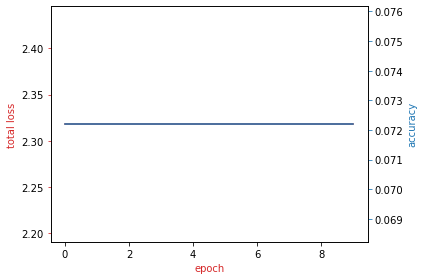

In [27]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

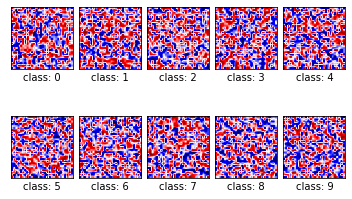

In [28]:
# Plot the parameters

PlotParameters(model)

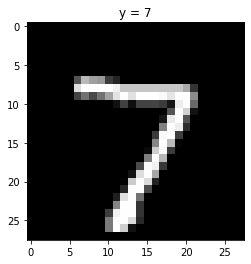

yhat: tensor([1])
probability of class  0.12948311865329742


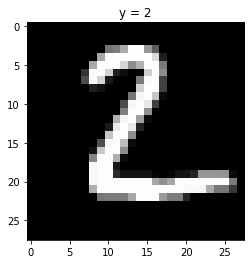

yhat: tensor([5])
probability of class  0.13238927721977234


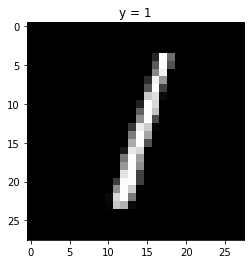

yhat: tensor([7])
probability of class  0.12440914660692215


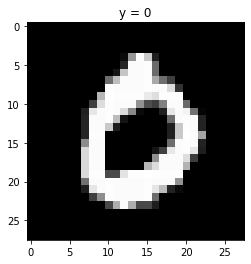

yhat: tensor([1])
probability of class  0.12321845442056656


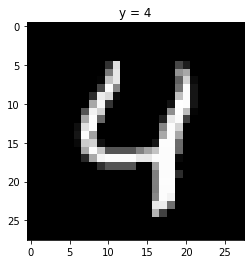

yhat: tensor([0])
probability of class  0.120524562895298


In [29]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

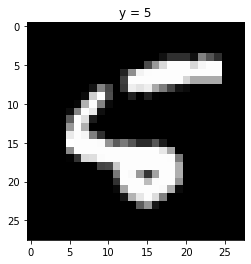

yhat: tensor([5])
probability of class  0.11895536631345749


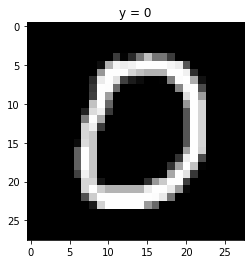

yhat: tensor([0])
probability of class  0.11823303252458572


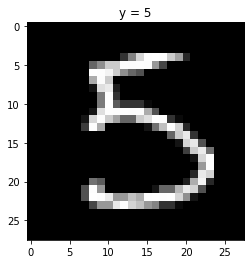

yhat: tensor([5])
probability of class  0.1205640435218811


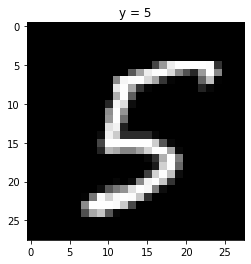

yhat: tensor([5])
probability of class  0.11629249900579453


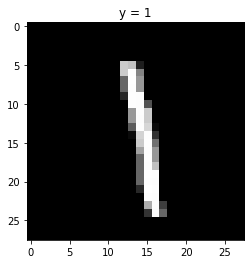

yhat: tensor([1])
probability of class  0.12816043198108673


In [30]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  